In [ ]:
# Importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Airline_Review.csv")

In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes


In [ ]:
# Printing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


In [ ]:
df.shape

(3580, 9)

In [ ]:
# Statistical summary for numerical columns
numerical_summary = df.describe()
print("Statistical Summary for Numerical Columns:\n")
numerical_summary

Statistical Summary for Numerical Columns:



,Rating
count,3575.000000
mean,4.790490
std,3.170323
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


In [ ]:
# Statistical summary for categorical columns
categorical_summary = df.describe(include=['object'])
print("\nStatistical Summary for Categorical Columns:\n")
categorical_summary


Statistical Summary for Categorical Columns:



,Passanger_Name,Flying_month,Route,Verified,Review_title,Review_content,Traveller_type,Class
count,3580,2815,2816,1270,3580,3580,3580,3579
unique,2764,1174,744,2,2570,3506,203,13
top,David Ellis,Aug-15,Economy Class,Trip Verified,British Airways customer review,I really do not have the energy to write very ...,A320,Economy Class
freq,44,25,846,1067,952,2,342,676


In [ ]:
# Checking if there are any null values in the dataset
df.isnull().sum()

Passanger_Name       0
Flying_month       765
Route              764
Rating               5
Verified          2310
Review_title         0
Review_content       0
Traveller_type       0
Class                1
dtype: int64

**Handling missing values in the dataset**

In [ ]:
# Drop rows with missing values in 'Flying_month' and 'Route' columns
df.dropna(subset=['Flying_month', 'Route'], inplace=True)

In [ ]:
# Impute missing values in 'Rating' column with median
median_rating = df['Rating'].median()
df['Rating'].fillna(median_rating, inplace=True)

In [ ]:
# Impute missing value in 'Class' column with most frequent class
most_frequent_class = df['Class'].mode()[0]
df['Class'].fillna(most_frequent_class, inplace=True)

In [ ]:
# Replace missing values in 'Verified' column with 'Unknown'
df['Verified'].fillna('Unknown', inplace=True)

In [ ]:
# Again checking for null values in the dataset
df.isnull().sum()

Passanger_Name    0
Flying_month      0
Route             0
Rating            0
Verified          0
Review_title      0
Review_content    0
Traveller_type    0
Class             0
dtype: int64

**Research Questions Analysis**

**Q1. What aspects of planning a vacation on an airline affect customers' decisions?**

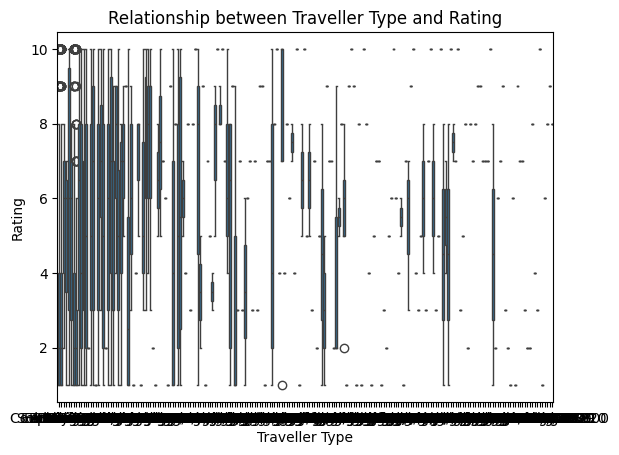

In [ ]:
# Examining the realtionship between rating and traveller type
sns.boxplot(x='Traveller_type', y='Rating', data=df)
plt.title("Relationship between Traveller Type and Rating")
plt.xlabel("Traveller Type")
plt.ylabel("Rating")
plt.show()

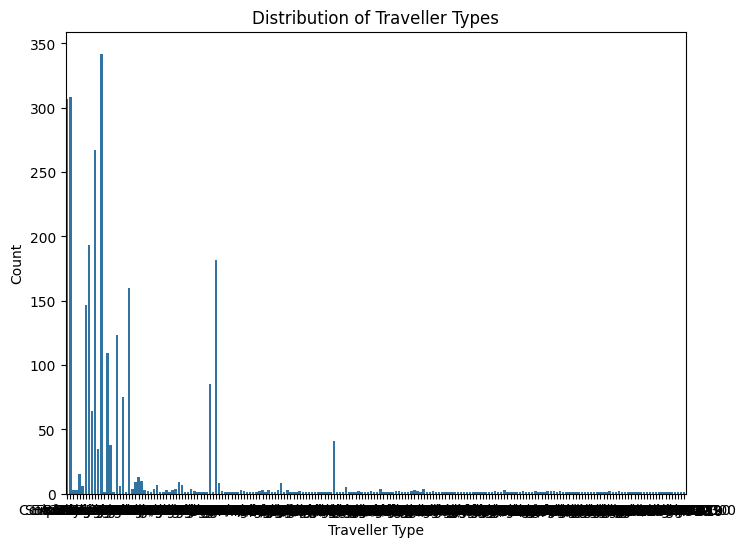

In [ ]:
# Countplot of Traveller Types
plt.figure(figsize=(8, 6))
sns.countplot(x='Traveller_type', data=df)
plt.title("Distribution of Traveller Types")
plt.xlabel("Traveller Type")
plt.ylabel("Count")
plt.show()

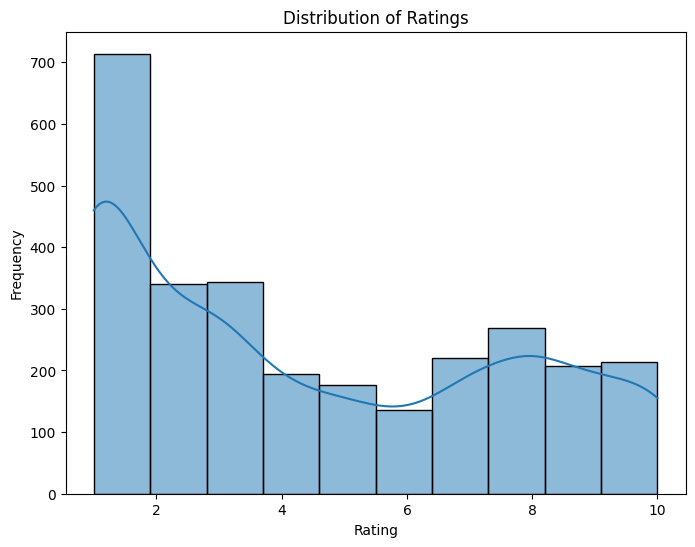

In [ ]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

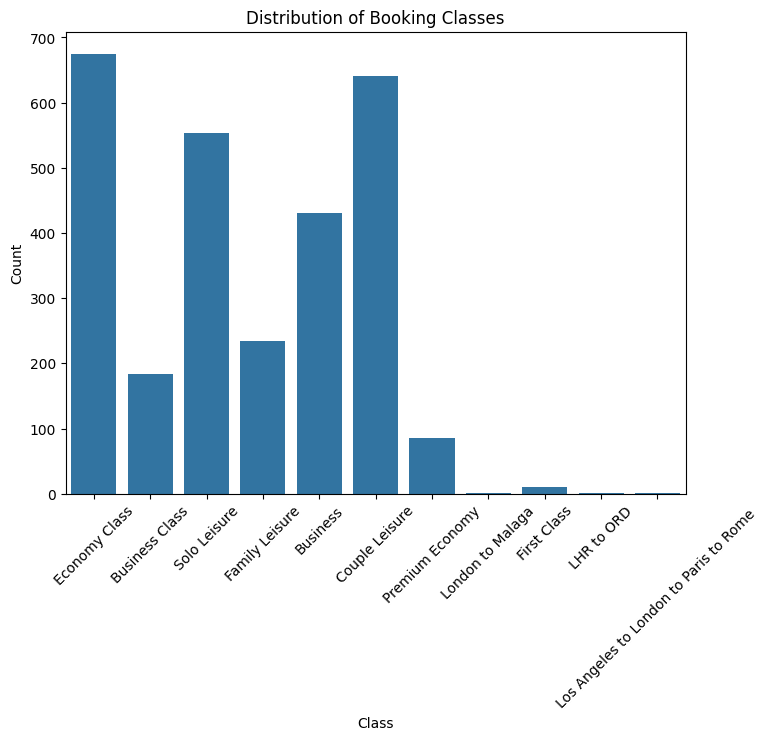

In [ ]:
# Countplot of class
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title("Distribution of Booking Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Q2. What impact does the time of booking have on the preferences and behaviour of customers?**

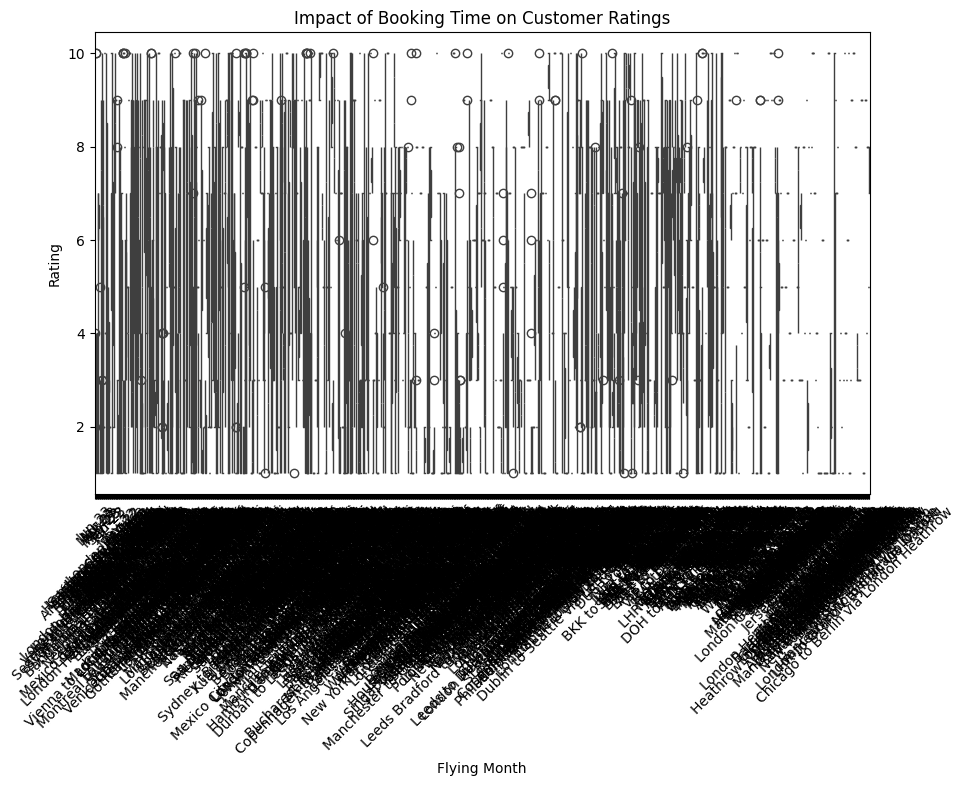

In [ ]:
# Analyzing the influence of booking time on customer behavior
# For example, we can compare the distribution of ratings for different booking months
plt.figure(figsize=(10, 6))
sns.boxplot(x='Flying_month', y='Rating', data=df)
plt.title("Impact of Booking Time on Customer Ratings")
plt.xlabel("Flying Month")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

<ipython-input-39-061ecf9cfccb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Flying_month', data=df, palette='viridis')


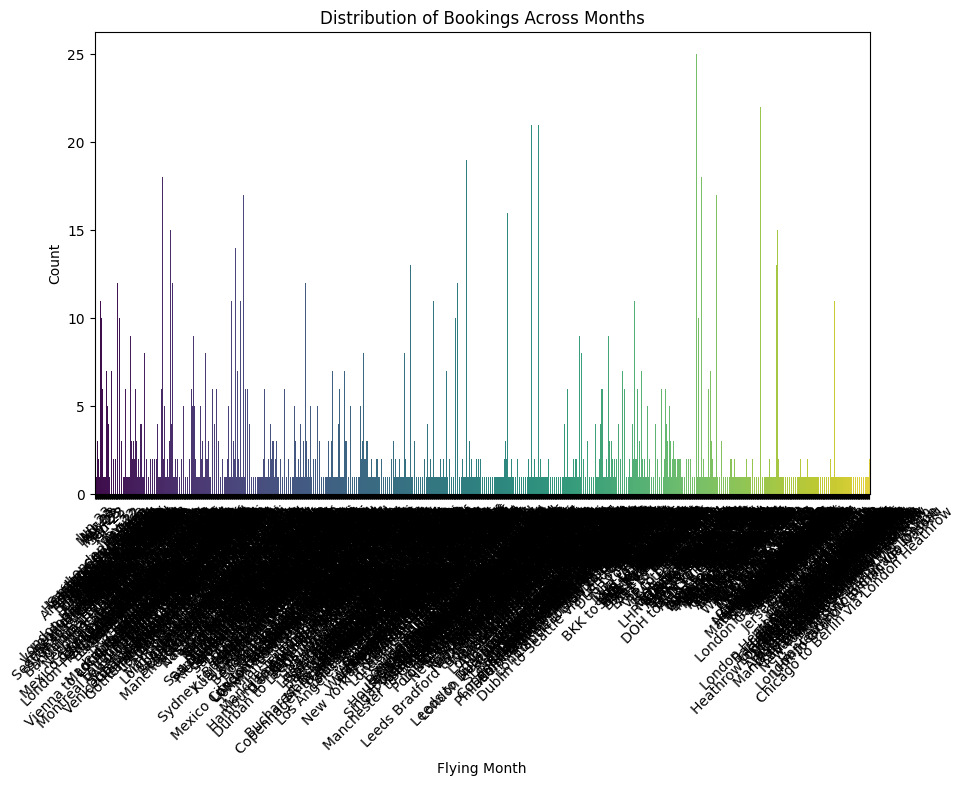

In [ ]:
# Countplot of Booking Months
plt.figure(figsize=(10, 6))
sns.countplot(x='Flying_month', data=df, palette='viridis')
plt.title("Distribution of Bookings Across Months")
plt.xlabel("Flying Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

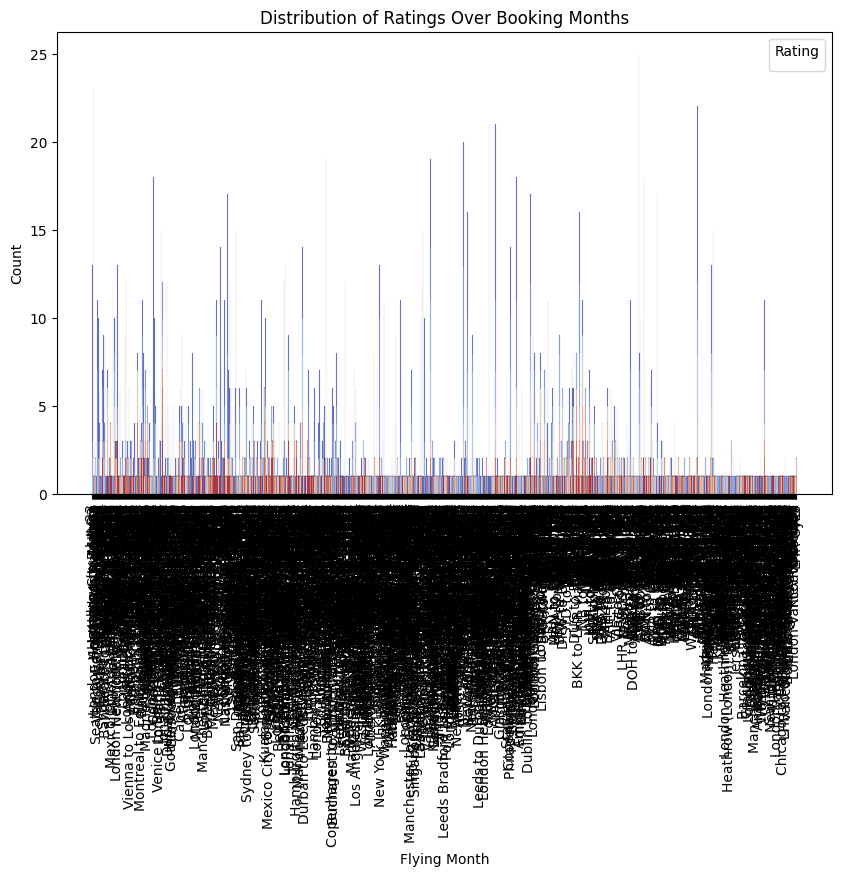

In [ ]:
# Distribution of Ratings over time
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Flying_month', hue='Rating', multiple="stack", palette='coolwarm')
plt.title("Distribution of Ratings Over Booking Months")
plt.xlabel("Flying Month")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Rating')
plt.show()

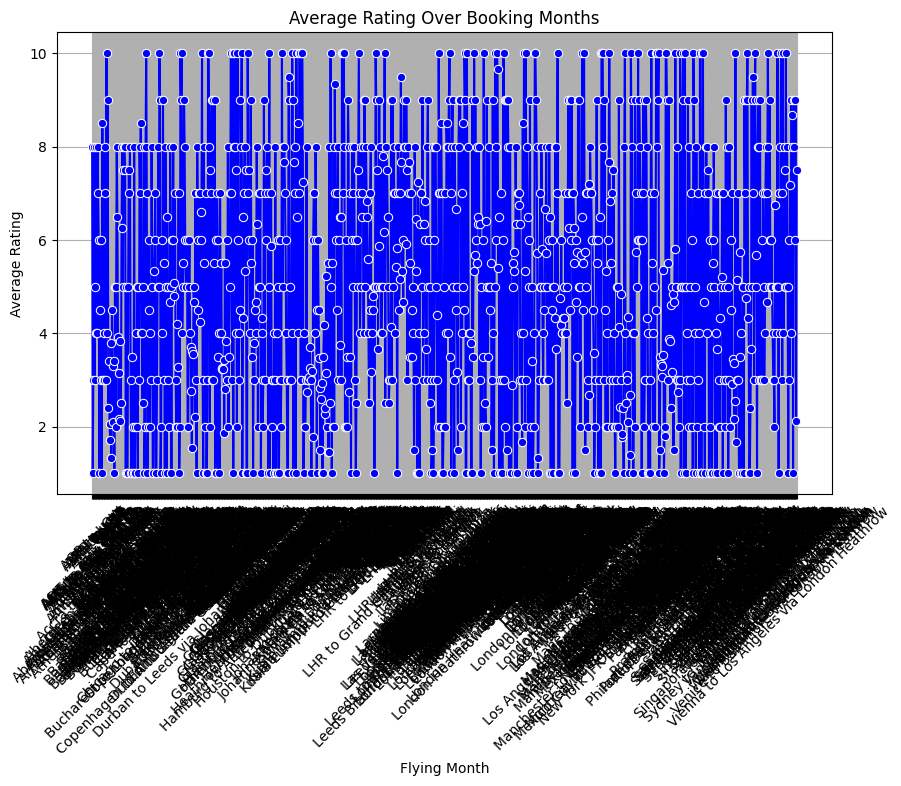

In [ ]:
# Lineplot of Average Ratings over time
avg_rating_month = df.groupby('Flying_month')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rating_month, x='Flying_month', y='Rating', marker='o', color='blue')
plt.title("Average Rating Over Booking Months")
plt.xlabel("Flying Month")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-42-068068929efe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Flying_month', y='Rating', data=df, inner='quartile', palette='pastel')


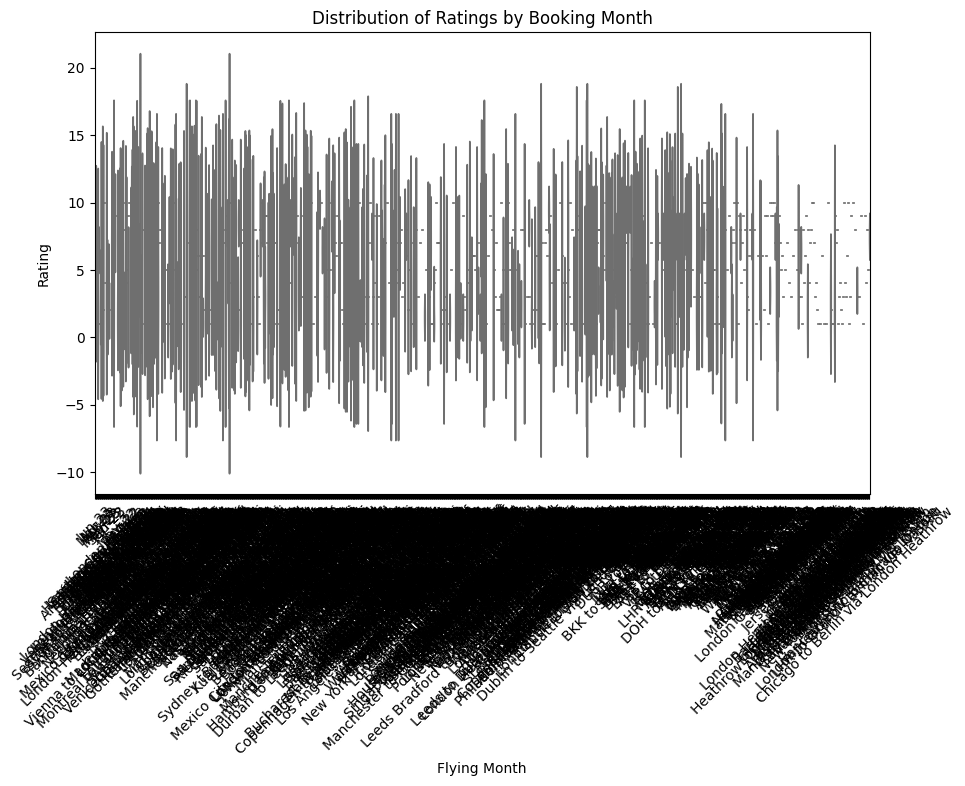

In [ ]:
# Violin plot of Ratings distribution by booking months
plt.figure(figsize=(10, 6))
sns.violinplot(x='Flying_month', y='Rating', data=df, inner='quartile', palette='pastel')
plt.title("Distribution of Ratings by Booking Month")
plt.xlabel("Flying Month")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

**Q3. Based on the traits of the consumer, is it possible to forecast the chance of a successful vacation reservation?**

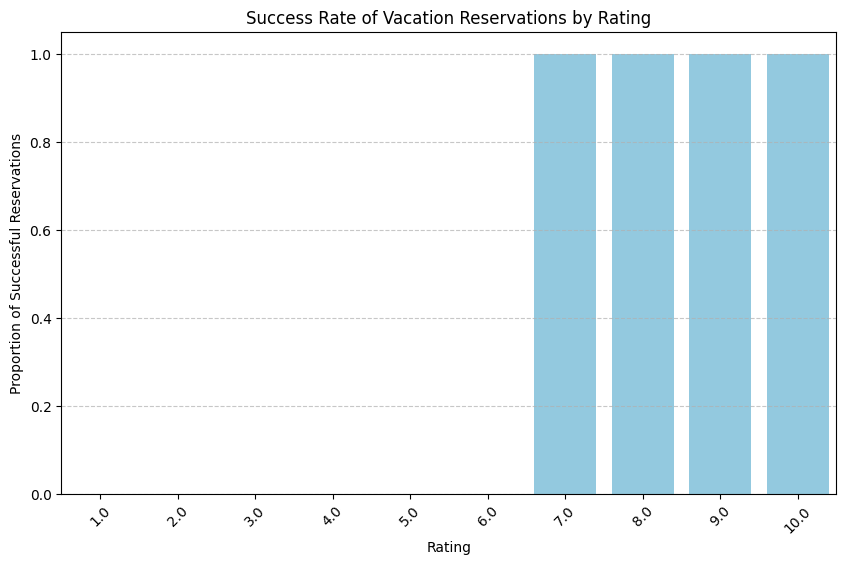

In [ ]:
# Define a threshold rating for successful reservations (you can adjust this based on your criteria)
success_rating_threshold = 7  # Example threshold: ratings above 4 are considered successful

# Define a function to label reservations as successful or not based on the rating threshold
def label_success(rating):
    return 'Successful' if rating >= success_rating_threshold else 'Unsuccessful'

# Apply the function to create a new column 'Reservation_Status'
df['Reservation_Status'] = df['Rating'].apply(label_success)

# Group the data by 'Rating' and calculate the proportion of successful reservations within each rating group
rating_success_rates = df.groupby('Rating')['Reservation_Status'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the relationship between ratings and reservation success rates
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_success_rates.index, y=rating_success_rates['Successful'], color='skyblue')
plt.title('Success Rate of Vacation Reservations by Rating')
plt.xlabel('Rating')
plt.ylabel('Proportion of Successful Reservations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

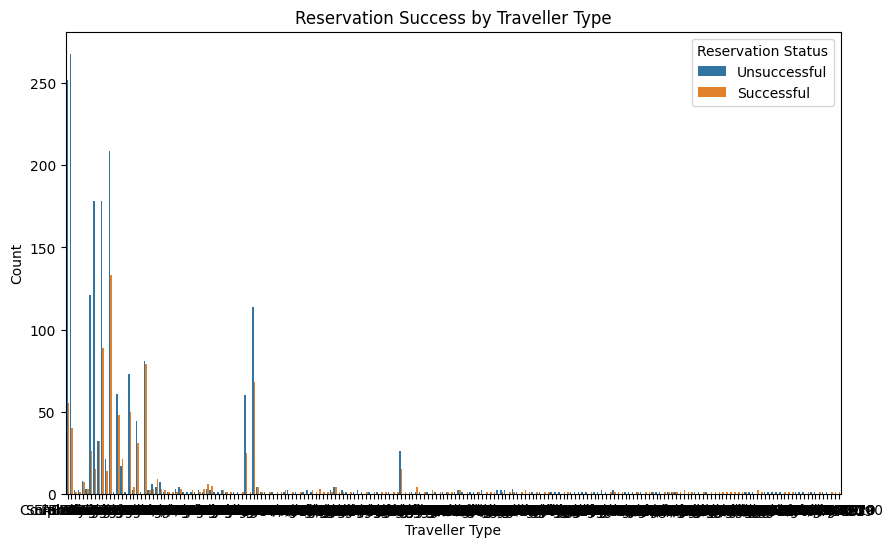

In [ ]:
# Plotting the count of successful vs. unsuccessful reservations by traveller type
plt.figure(figsize=(10, 6))
sns.countplot(x='Traveller_type', hue='Reservation_Status', data=df)
plt.title('Reservation Success by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Count')
plt.legend(title='Reservation Status')
plt.show()

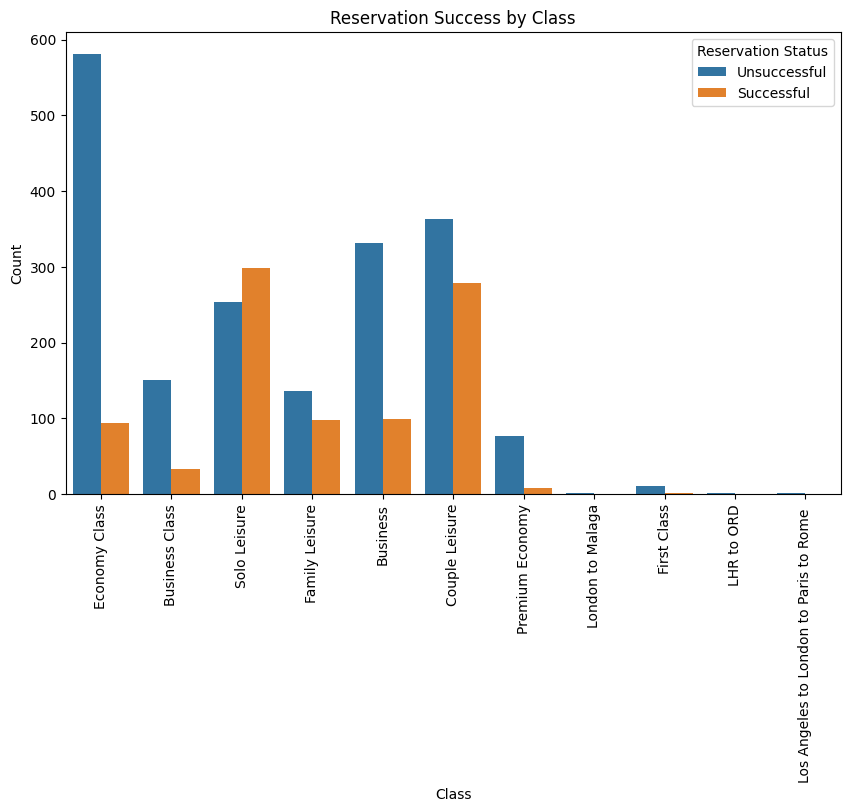

In [ ]:
# Plotting the count of successful vs. unsuccessful reservations by class
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Reservation_Status', data=df)
plt.title('Reservation Success by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Reservation Status')

# Rotating x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

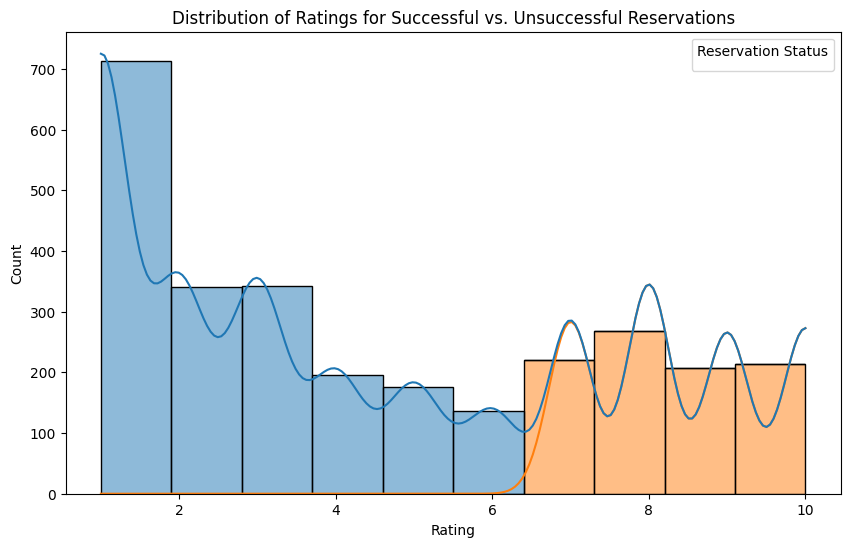

In [ ]:
# Plotting histograms of ratings for successful and unsuccessful reservations
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', hue='Reservation_Status', multiple='stack', bins=10, kde=True)
plt.title('Distribution of Ratings for Successful vs. Unsuccessful Reservations')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Reservation Status')
plt.show()

**Q4. Which flight schedules and itineraries are the most popular among passengers?**

In [ ]:
# Analyzing the popularity of various routes and flight schedules
# For example, we can count the number of reviews for each route
route_counts = df['Route'].value_counts()
print("Popularity of Routes:\n", route_counts.head(10))

Popularity of Routes:
 Route
Economy Class          846
Business Class         683
Premium Economy        186
First Class            143
Amsterdam to London      6
New York to London       6
London to Delhi          5
Hong Kong to London      5
Rome to London           5
London to Madrid         5
Name: count, dtype: int64


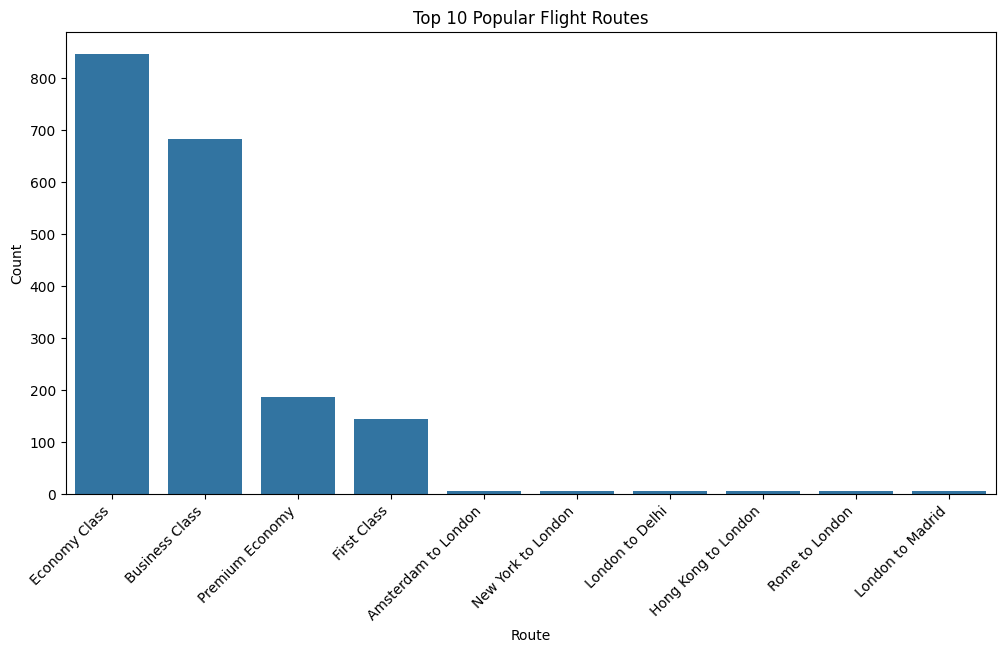

In [ ]:
# Plotting the count of flights for each route
plt.figure(figsize=(12, 6))
sns.countplot(x='Route', data=df, order=df['Route'].value_counts().index[:10])
plt.title('Top 10 Popular Flight Routes')
plt.xlabel('Route')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-55-e805c62daef9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Route', y='Rating', data=df, ci=None, order=df.groupby('Route')['Rating'].mean().sort_values(ascending=False).index[:10])


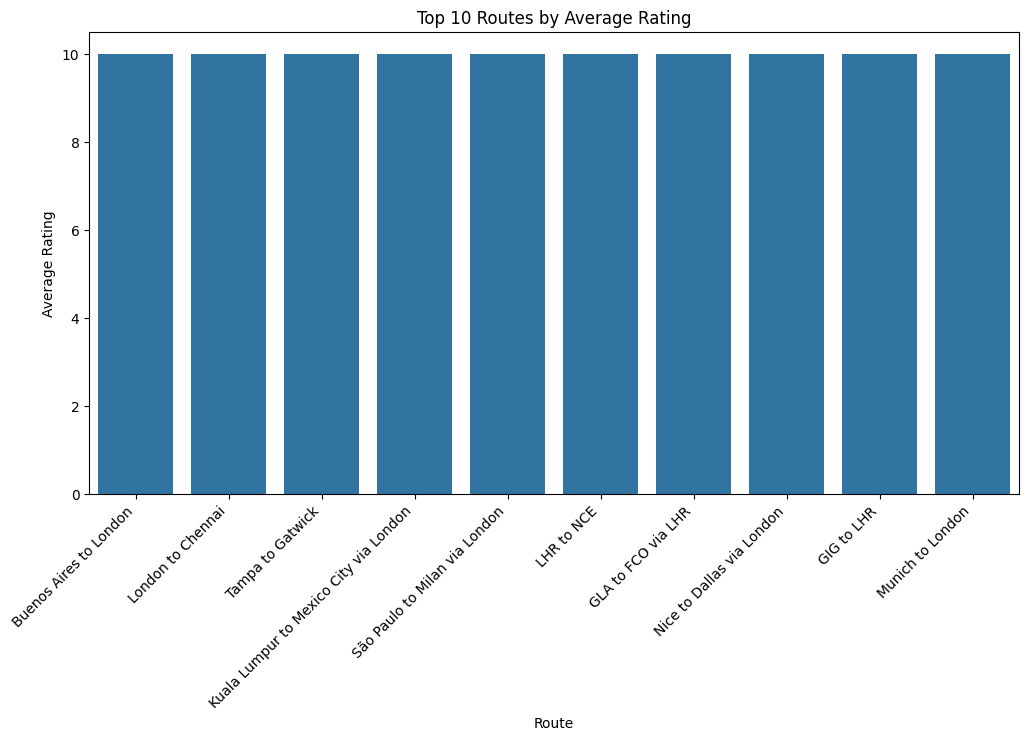

In [ ]:
# Plotting the average rating for each route
plt.figure(figsize=(12, 6))
sns.barplot(x='Route', y='Rating', data=df, ci=None, order=df.groupby('Route')['Rating'].mean().sort_values(ascending=False).index[:10])
plt.title('Top 10 Routes by Average Rating')
plt.xlabel('Route')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

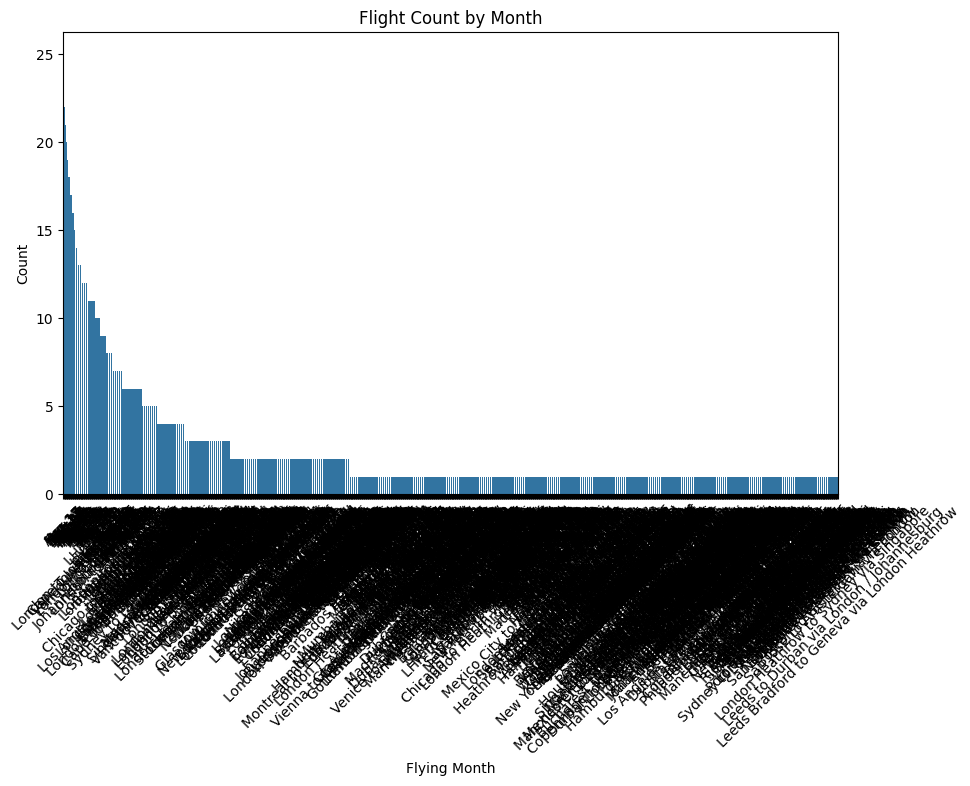

In [ ]:
# Plotting the count of flights for each flying month
plt.figure(figsize=(10, 6))
sns.countplot(x='Flying_month', data=df, order=df['Flying_month'].value_counts().index)
plt.title('Flight Count by Month')
plt.xlabel('Flying Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Conducting a chi-square test of independence to test the hypothesis that customer attributes influence the chance of a successful vacation reservation**

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Create a contingency table for traveller type and reservation status
contingency_table = pd.crosstab(df['Traveller_type'], df['Reservation_Status'])

# Print the contingency table
print("Contingency Table:")
contingency_table

Contingency Table:


Reservation_Status,Successful,Unsuccessful
Traveller_type,,
767-300,0,1
777,1,2
777-200,0,1
777-300,1,0
787,0,1
...,...,...
SAAB 2000,1,0
Saab 2000,1,0
Solo Leisure,55,252


In [ ]:
# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square Test Results:
Chi-square statistic: 458.4828700307012
P-value: 1.5863250173013544e-22
Degrees of Freedom: 199
Expected frequencies:
[[  0.32326821   0.67673179]
 [  0.96980462   2.03019538]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  1.61634103   3.38365897]
 [ 35.23623446  73.76376554]
 [  0.64653641   1.35346359]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.96980462   2.03019538]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.32326821   0.67673179]
 [  0.96980462   2.03019538]
 [  0.64653641   1.35346359]
 [110.55772647 231.44227353]
 [  0.64653641   1.35346359]
 [  0.32326821   0.67673179]
 [  1.29307282   2.70692718]
 [  0.96980462   2.03019538]
 [  0.32326821   0.67673179]
 [  0.32326821 

In [ ]:
# Interpret the test results
alpha = 0.05
print("\nHypothesis Testing:")
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant association between customer attributes and reservation status.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant association between customer attributes and reservation status.")


Hypothesis Testing:
Reject the null hypothesis (H0). There is a significant association between customer attributes and reservation status.
